In [16]:
import pandas as pd
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [6]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [8]:
df = df.drop("CustomerID",axis=1)

In [9]:
#df.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
5,Female,22,17,76
6,Female,35,18,6
7,Female,23,18,94
8,Male,64,19,3
9,Female,30,19,72


In [37]:
#Data Preprocessing

df = pd.get_dummies(df)

In [14]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000,0.560000,0.440000
std,13.969007,26.264721,25.823522,0.497633,0.497633
min,18.000000,15.000000,1.000000,0.000000,0.000000
25%,28.750000,41.500000,34.750000,0.000000,0.000000
50%,36.000000,61.500000,50.000000,1.000000,0.000000
75%,49.000000,78.000000,73.000000,1.000000,1.000000
max,70.000000,137.000000,99.000000,1.000000,1.000000


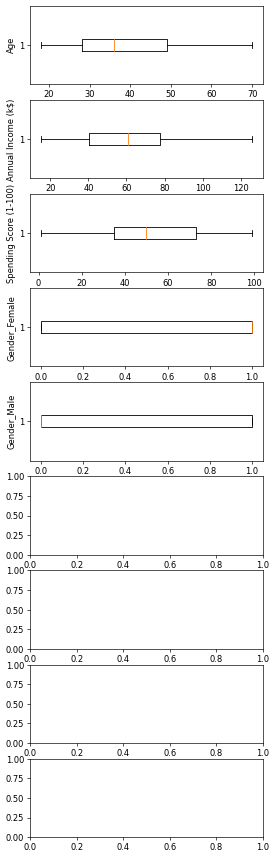

In [36]:
fig, axs = plt.subplots(9,1,dpi=60, figsize=(5,18))
i = 0
for col in df.columns:
    axs[i].boxplot(df[col], vert=False)
    axs[i].set_ylabel(col)
    i+=1
plt.show()

In [33]:
q1, q3 = np.percentile(df['Annual Income (k$)'], [25, 75])

iqr = q3 - q1

lower_bound = q1 - (1.5 * iqr)

upper_bound = q3 + (1.5 * iqr)

clean_data = df[(df['Annual Income (k$)'] >= lower_bound) 
                & (df['Annual Income (k$)'] <= upper_bound)]
df = clean_data

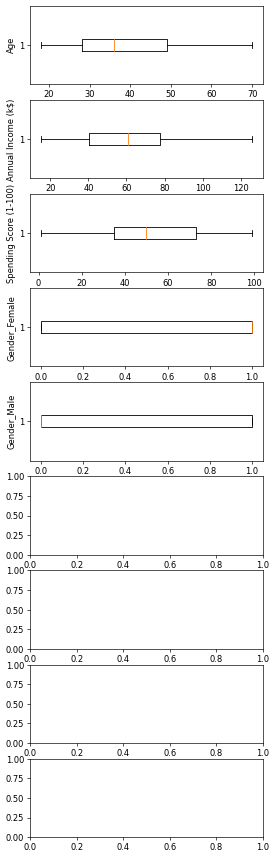

In [34]:
fig, axs = plt.subplots(9,1,dpi=60, figsize=(5,18))
i = 0
for col in df.columns:
    axs[i].boxplot(df[col], vert=False)
    axs[i].set_ylabel(col)
    i+=1
plt.show()

In [40]:
#Data Visualization

corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\DELL\AppData\Local\Temp\ipykernel_9320\3970361697.py:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
Age,1.00,0.00,-0.33,-0.07,0.07
Annual Income (k$),0.00,1.00,0.01,-0.02,0.02
Spending Score (1-100),-0.33,0.01,1.00,0.06,-0.06
Gender_Female,-0.07,-0.02,0.06,1.00,-1.00
Gender_Male,0.07,0.02,-0.06,-1.00,1.00


In [41]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0


<Axes: >

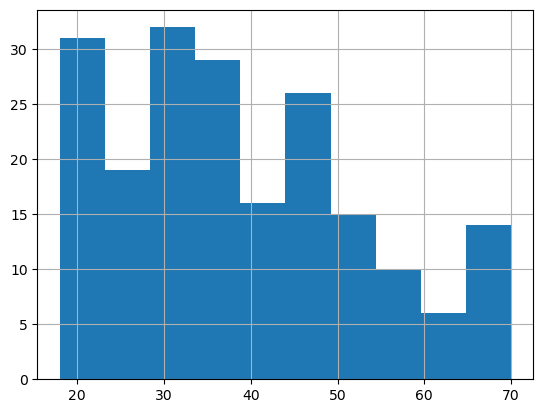

In [42]:
df['Age'].hist()

<Axes: >

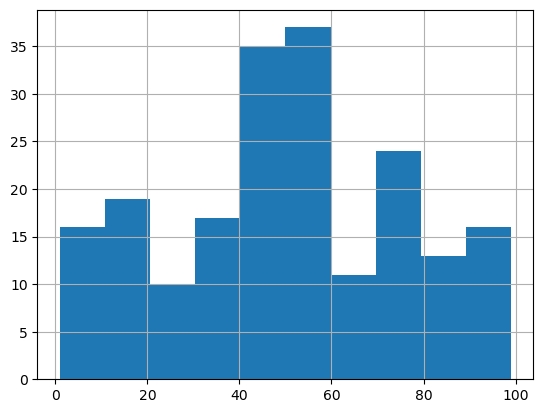

In [44]:
df['Spending Score (1-100)'].hist()

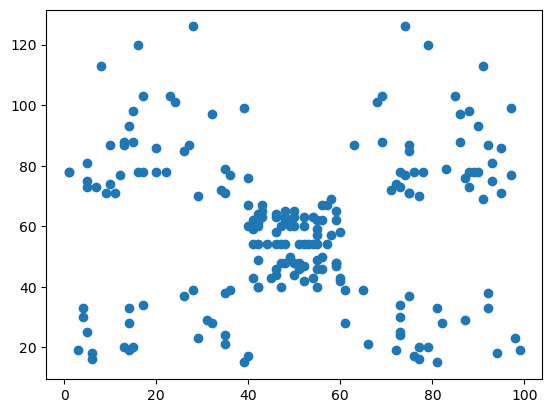

In [52]:
plt.scatter(df["Spending Score (1-100)"],df["Annual Income (k$)"])
plt.show()

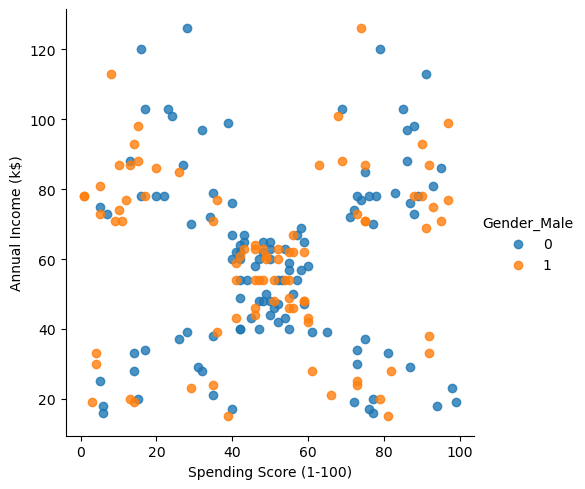

In [59]:
sns.lmplot( x="Spending Score (1-100)", y="Annual Income (k$)", data=df, hue='Gender_Male',fit_reg=False)